# Understanding RNN's 💡

- designed for processing sequential data, where the order of elements is important (needed for time series)
- captures temporal dependencies and patterns within sequences
- length of the sequence is flexible!
- in long sequences, RNN's does not learn global information (e.g. trend) --> Transformers can do that
- biggest limitation is the vanishing gradient problem, which makes it impossible to learn long-range dependencies --> LSTM as solution
- Actually no one uses the vanilla RNN's in practice, but rather the LSTM or GRU

## General Architecture of vanilla RNN

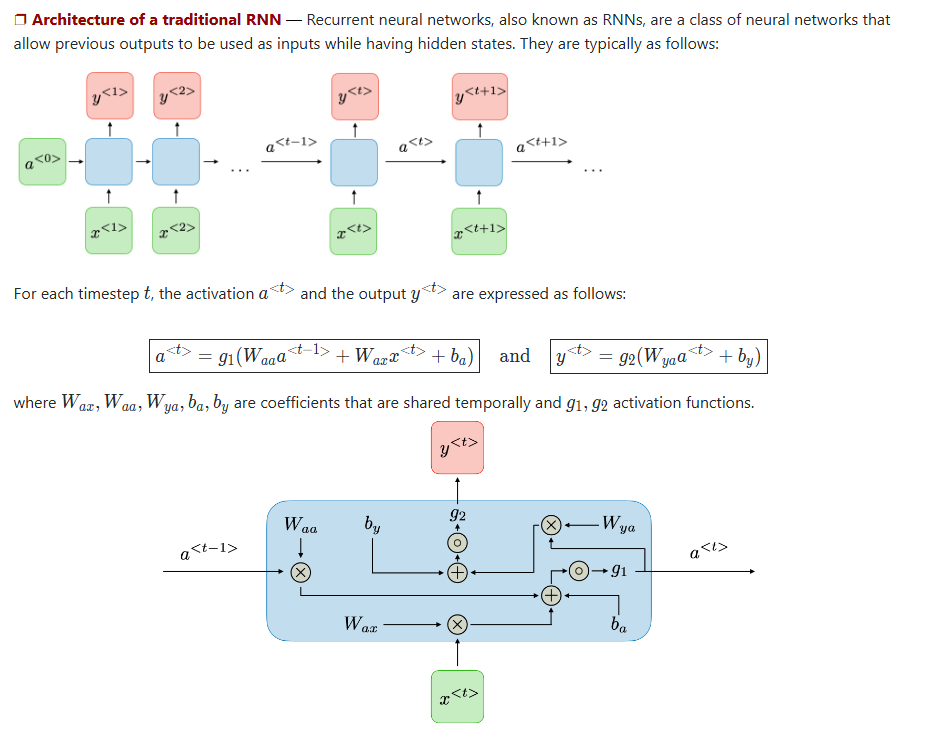

Source: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

### Unrolling the network

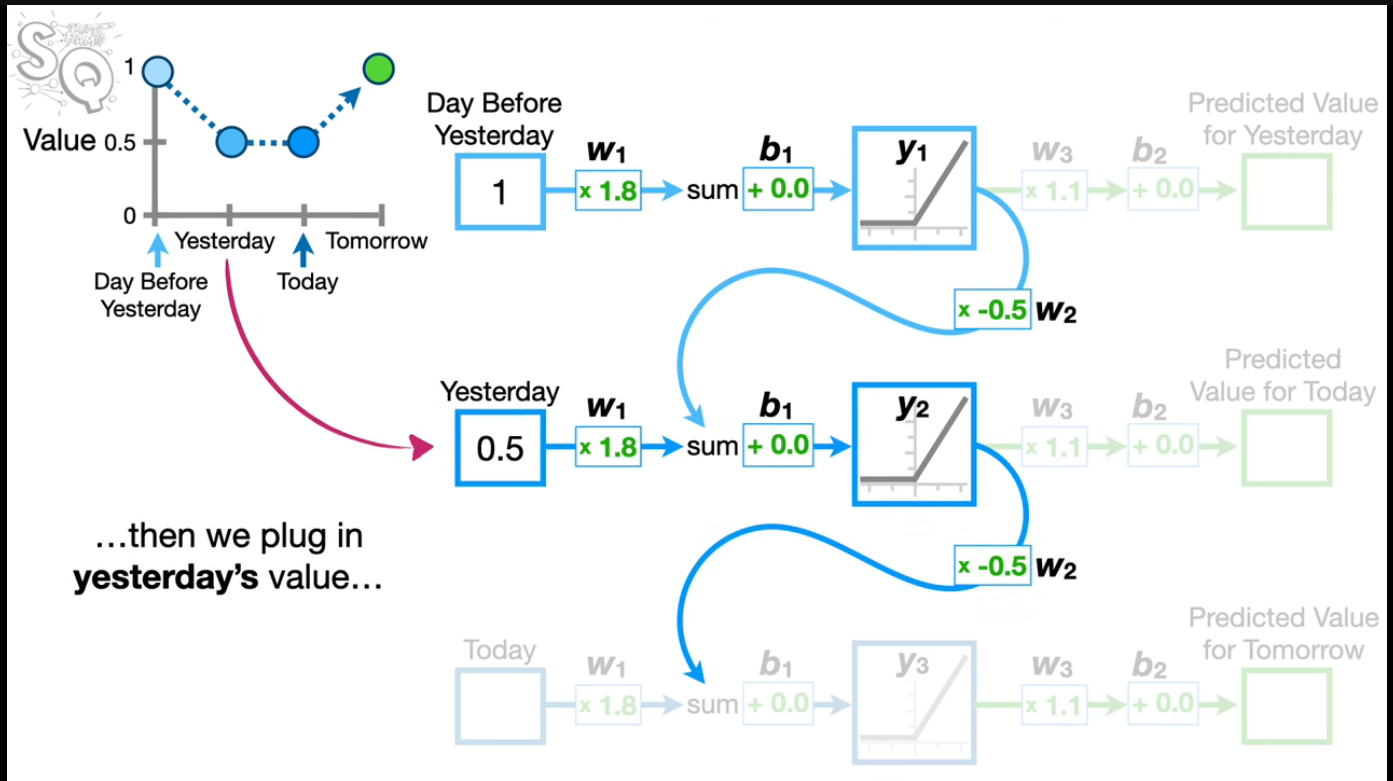

### Exploding Gradient Problem visualized

- This is the main reason why vanilla RNN's are hard to train

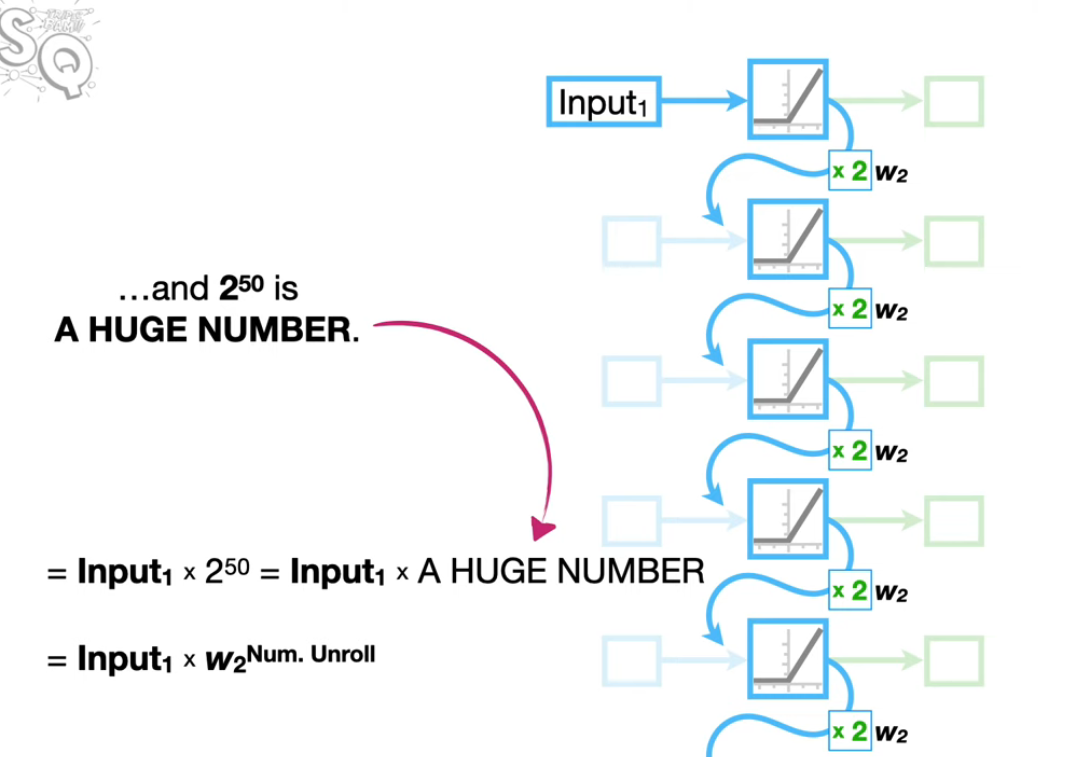

# Long Short Term Memory (LSTM)

- widely used in research as the go-to variant of RNN

Basic idea: include long term memory via separate path:

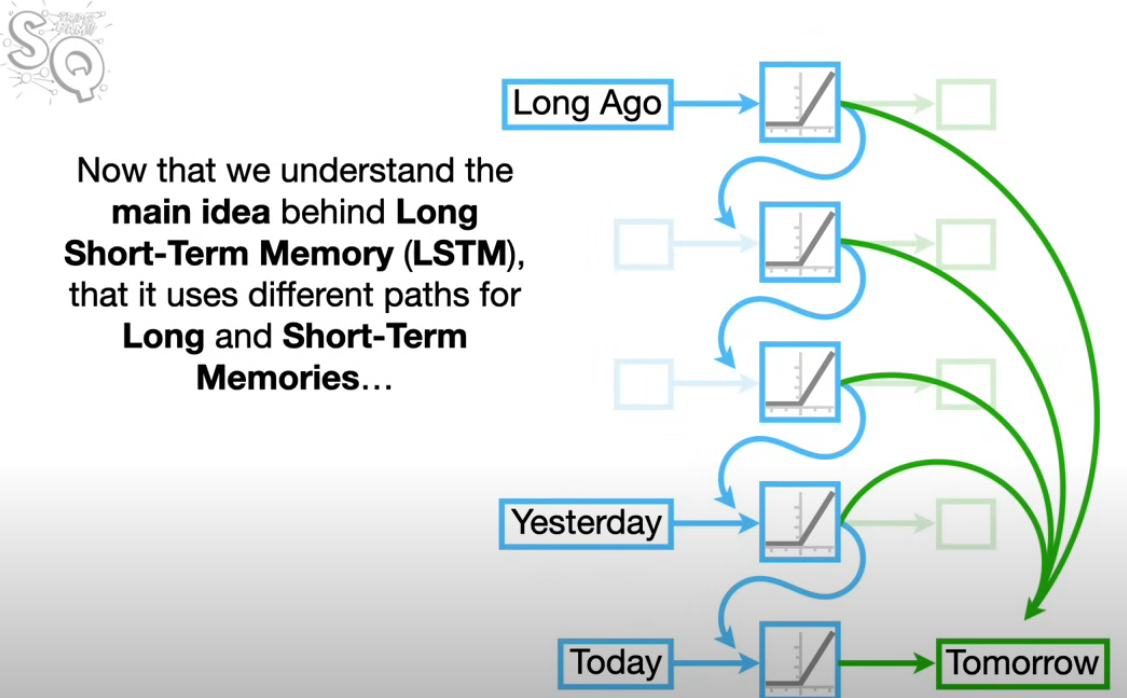

## General Architecture

- the bias and weights of each recurrent unit will be the same! --> to handle input sequences of varying length

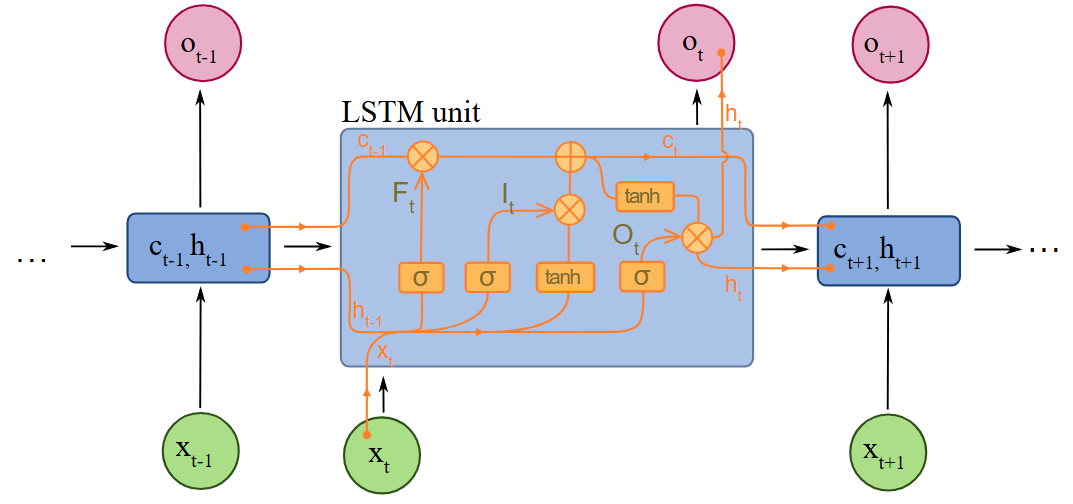

- ht...hidden state, which corresponds to the short-term memory. Is more sensitive to recent inputs
- ct...cell state, corresponding to long-term memory --> no weights and bias (no vanishing/exploding gradient problem); carries information across long sequences and has linear interactions which can retain but also discard information over time.

Source: https://en.wikipedia.org/wiki/Recurrent_neural_network

## Forget Gate F_t

- the +1.62 represents the bias that we add (it's not the sum)
- 1x2.7 + -10*1.63 + 1.62 will be input to the sigmoid activation function. If the value is highly negative, the output will be 0 and Long-Term memory will copmpletely forgotten.

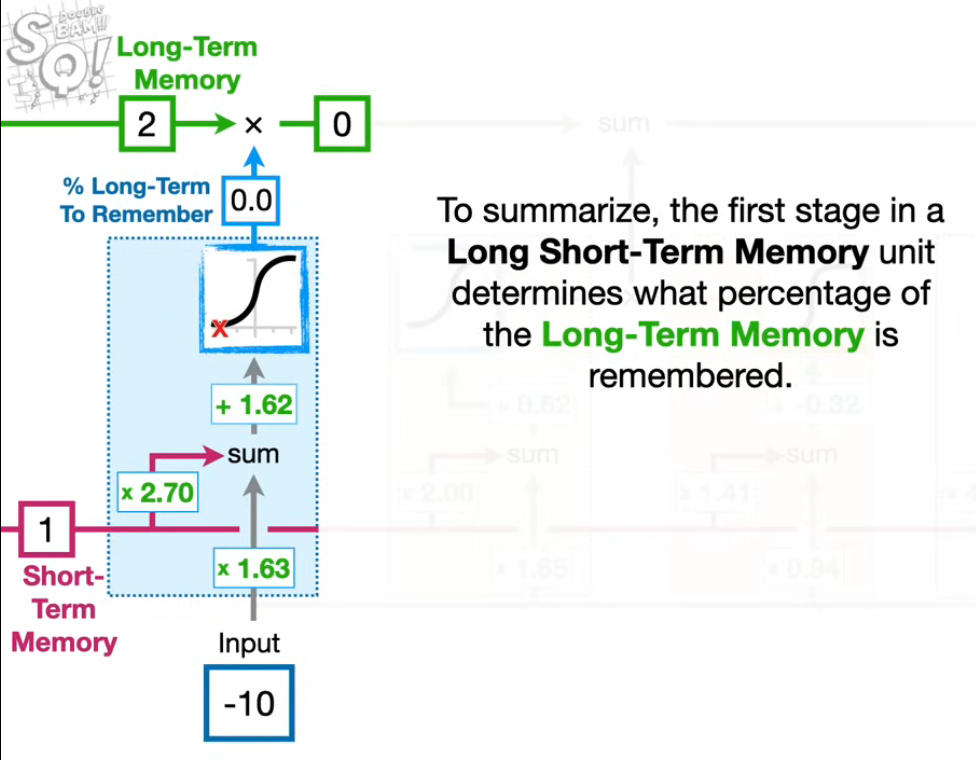

## Input Gate I_t

- actually, the input for the activation functions is always h_t * weight_1 + input * weight_2 + bias

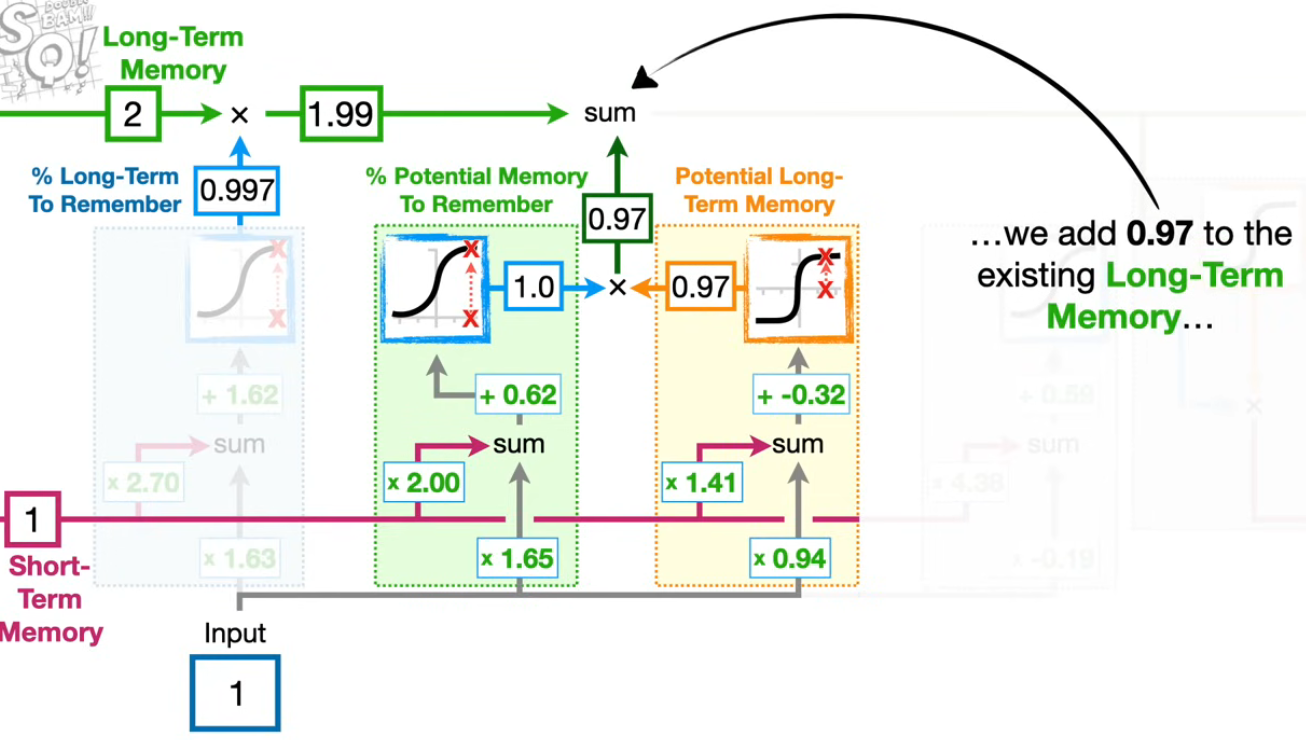

## Output Gate O_t

- the long term memory value is input to a tanh activation function
- the output of the LSTM is the short-term memory in last unit
- the output is bounded by -1 and 1

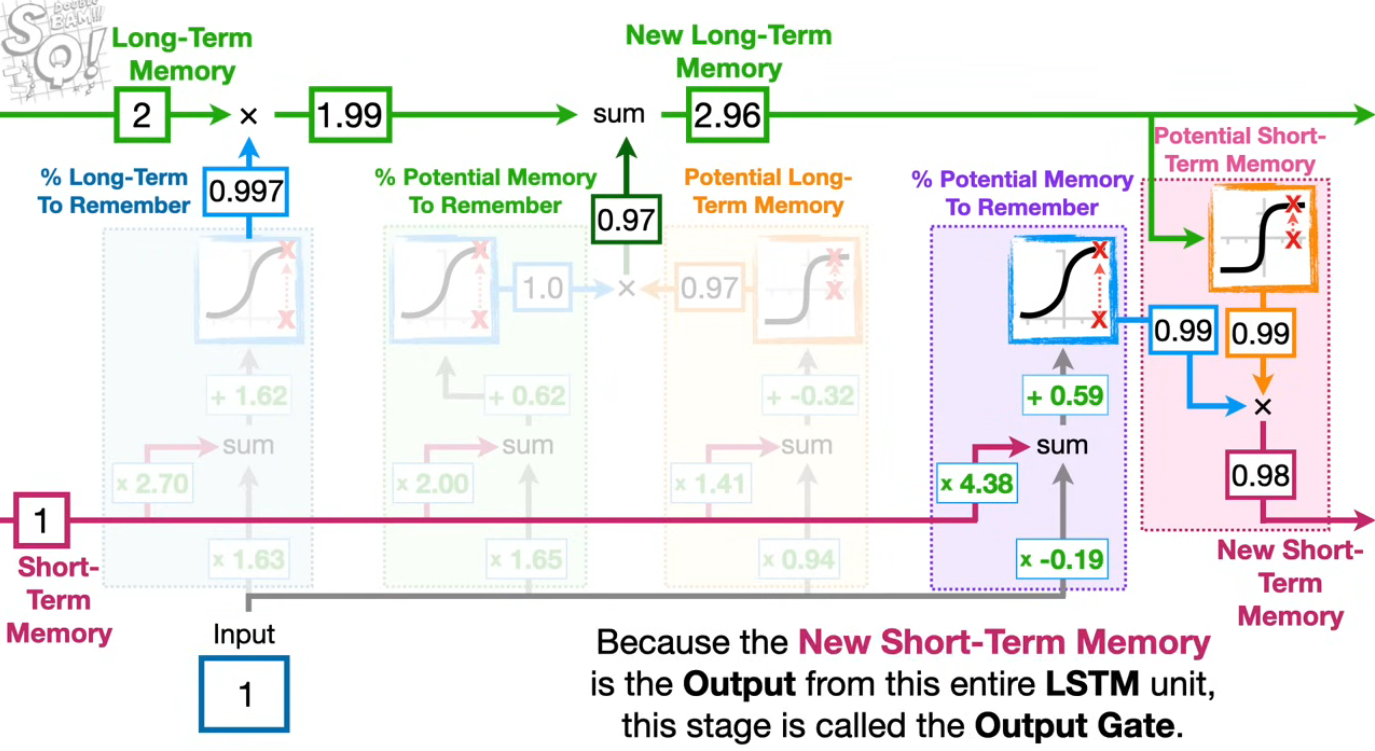

### LSTM
- number of parameters only depends on hidden size, # features and # layers, not on the # lags
- each input value gets 4 weights per LSTM cell in the first layer, if hidden_size=64, then the number of weights equals 4x(#features x 64) + 4x(64 x 64) for the recurrent weights. In each of the 4 gates, there is this 64x64 matrix with recurrent weights from the last timestep h_t-1
- with more time lags, the memory demand increases but the model can also model long-term dependencies better 
